<a href="https://colab.research.google.com/github/ninivehelen/Analise_De_Dados/blob/master/analise_dados_suicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [140]:
df_suicidio = pd.read_csv("/content/drive/MyDrive/suicide.csv")

In [141]:
df_suicidio.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


# Dicionário dos dados
**Country**: Coluna que representa os países (string)

**Year**: Coluna que representa os anos (integer)

**Sex**: Coluna que representa os gêneros (string)

**Age**: Coluna que representa as idades (string)

**Suicides_no**: Coluna que representa o número de suicídios (integer)

**Population**: Coluna que representa a população (integer)

**Suicides/100k pop**: Coluna que representa o número de suicídio a cada 100 mil habitantes (float)

**Country-year**: Coluna que representa (string)

**HDI for year**: Coluna que representa o IDH em cada ano (float)

**Gdp_for_year** ($): Coluna que representa o PIB em cada ano (string)

**Gdp_per_capita** ($): Coluna que representa o PIB per capita (float)

**Generation**: Coluna que representa a geração (string)



**soma de suicidio nos países**

In [142]:
df_suicidio.filter(items = ['suicides_no' ,'country']).groupby('country').sum().sort_values(by='suicides_no',ascending=False)

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
...,...
Maldives,20
Antigua and Barbuda,11
San Marino,4


**Grafico de suicidio no mundo**

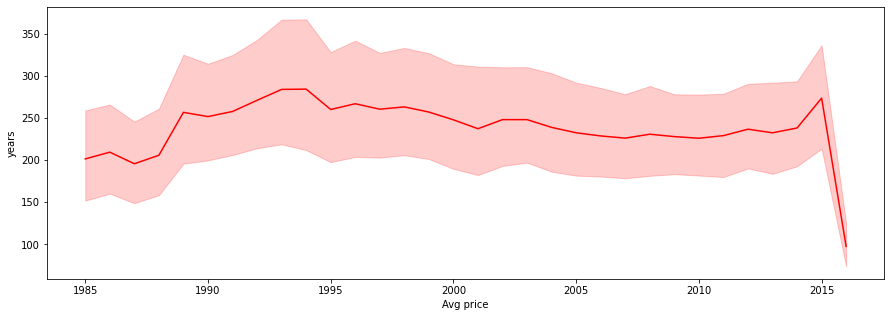

In [143]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_suicidio['year'],y=df_suicidio['suicides_no'], color="red")
plt.xlabel('Avg price')
plt.ylabel('years')
plt.show()

**media de suicidio nos países**

In [144]:
df_suicidio.filter(items = ['suicides_no' ,'country']).groupby('country').mean().sort_values(by='suicides_no',ascending=False)

,suicides_no
country,
Russian Federation,3733.771605
United States,2779.604839
Japan,2169.091398
Ukraine,952.232143
Germany,933.532051
...,...
Grenada,0.122581
San Marino,0.111111
Antigua and Barbuda,0.033951


**Media percapita dos países**

In [145]:
df_suicidio.filter(items = ['gdp_per_capita ($)' ,'country']).groupby('country').mean().sort_values(by='gdp_per_capita ($)',ascending=False)

,gdp_per_capita ($)
country,
Luxembourg,68798.387097
Qatar,67756.449438
Switzerland,62981.761905
Norway,57319.600000
San Marino,53663.666667
...,...
Azerbaijan,1005.125000
Uzbekistan,976.181818
Sri Lanka,904.272727


**Media de suicidio no pais com maior renda per capita**

In [146]:
luxembourg_media= df_suicidio[df_suicidio["country"]=="Luxembourg"]

In [147]:
luxembourg_media.filter(items = ['suicides_no' ,'country']).groupby('country').mean().sort_values(by='suicides_no',ascending=False)

,suicides_no
country,
Luxembourg,5.263441


**Qual geraçao cometeu mais suicidio**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


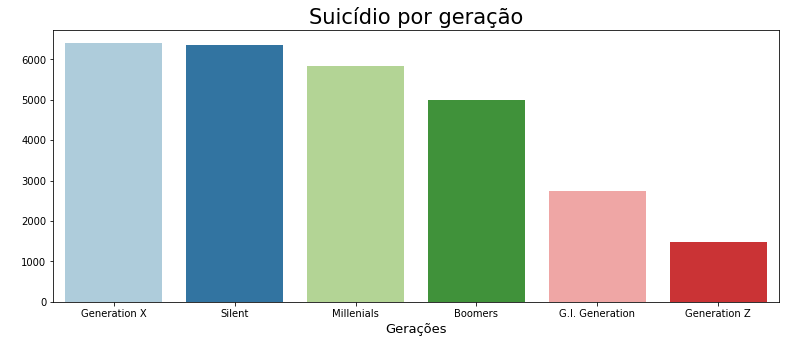

In [148]:
fig = plt.figure(figsize=(13,5))
sns.countplot('generation', order = df_suicidio['generation'].value_counts().index, palette="Paired", data = df_suicidio)
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Suicídio por geração',fontsize=21);

**Suicidio por geraçao mundial valores**

In [149]:
df_suicidio.filter(items = ['suicides_no' ,'generation']).groupby('generation').count().sort_values(by='suicides_no',ascending=False)

,suicides_no
generation,
Generation X,6408
Silent,6364
Millenials,5844
Boomers,4990
G.I. Generation,2744
Generation Z,1470


**Taxa de suicidio por faixa etaria**

In [150]:
tabela = pd.pivot_table(df_suicidio, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '+75 years']
tabela = tabela.reindex(column_order, axis=1)
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,10.250000,186.145833,216.364583,372.375000,299.333333,NaN
1986,9.833333,188.156250,225.885417,391.229167,310.000000,NaN
1987,8.657407,152.148148,206.564815,376.379630,300.638889,NaN
1988,8.540816,156.500000,217.673469,395.612245,311.612245,NaN
1989,11.057692,179.192308,282.951923,514.817308,385.451923,NaN


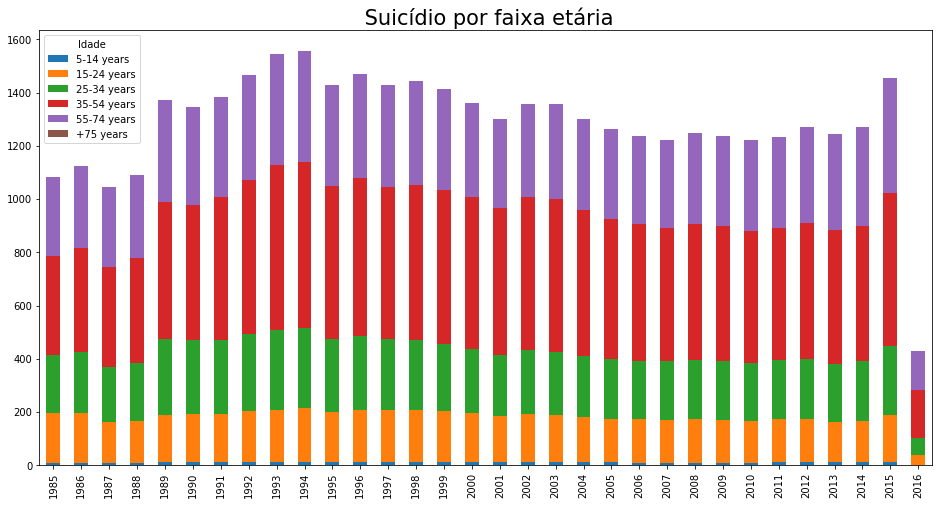

In [151]:
tabela.plot.bar(stacked=True,figsize=(16,8))
plt.legend(title='Idade')
plt.xlabel(' ')
plt.title(' Suicídio por faixa etária',fontsize=21);

In [152]:
cor = ['#f78981', '#81f795']

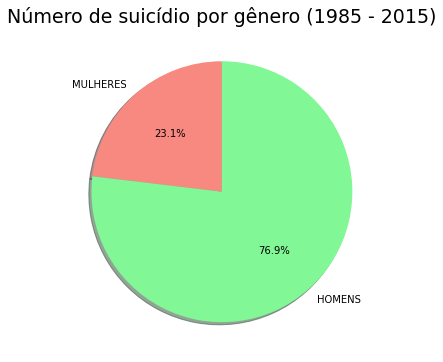

In [153]:
generos = df_suicidio.groupby('sex').suicides_no.sum() / df_suicidio.groupby('sex').suicides_no.sum().sum()
fig = plt.figure(figsize=(6,6))
plt.pie(generos, labels=['MULHERES', 'HOMENS'], colors=cor, autopct='%1.1f%%', shadow = True, startangle=90)
plt.title('Número de suicídio por gênero (1985 - 2015)', fontsize=19);

# **Analisando dados de suicidio no Brasil**

In [154]:
df_suicidio_brasil = df_suicidio[df_suicidio["country"]=="Brazil"]

In [155]:
df_suicidio_brasil.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X
4177,Brazil,1985,female,75+ years,32,988100,3.24,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4178,Brazil,1985,female,55-74 years,148,5650100,2.62,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4179,Brazil,1985,female,25-34 years,269,10798700,2.49,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4180,Brazil,1985,female,35-54 years,296,12185200,2.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4181,Brazil,1985,female,15-24 years,280,13751800,2.04,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [156]:
mulheres = df_suicidio_brasil[df_suicidio_brasil["sex"]=="female"]
colunas=["sex","age", "suicides_no"]
mulheres = mulheres.filter(items = colunas)

homens = df_suicidio_brasil[df_suicidio_brasil["sex"]=="male"]
colunas=["sex","age", "suicides_no"]
homens= homens.filter(items = colunas)


**Quantidade de suicidio por faixa de idade/**
**Mulheres**

In [157]:
mulheres.filter(items = ['suicides_no' ,'age']).groupby('age').mean().sort_values(by='suicides_no',ascending=False)


,suicides_no
age,
35-54 years,560.000000
15-24 years,350.870968
25-34 years,324.677419
55-74 years,248.774194
75+ years,51.677419
5-14 years,45.129032


**Quantidade de suicidio por faixa de idade/**
**Homens**

In [158]:
homens.filter(items = ['suicides_no' ,'age']).groupby('age').mean().sort_values(by='suicides_no',ascending=False)

,suicides_no
age,
35-54 years,2016.129032
25-34 years,1369.967742
15-24 years,1087.741935
55-74 years,962.709677
75+ years,239.838710
5-14 years,52.580645


**Gráficos**

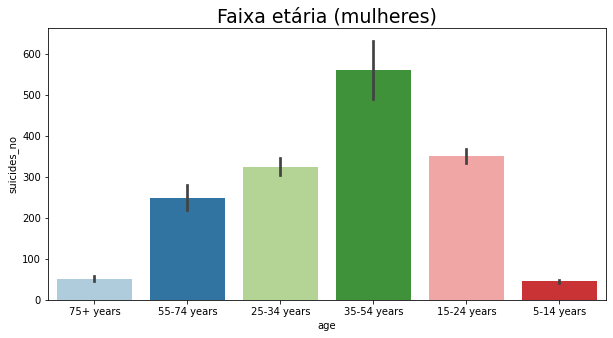

In [159]:
idade = mulheres["age"]
valor = mulheres["suicides_no"]
fig = plt.figure(figsize=(10,5))
sns.barplot(x=idade, y = valor, data=mulheres, palette="Paired")
plt.title('Faixa etária (mulheres)', fontsize=19);

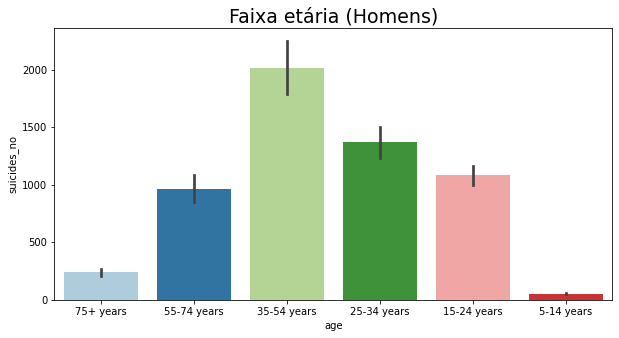

In [160]:
idade = homens["age"]
valor = homens["suicides_no"]
fig = plt.figure(figsize=(10,5))
sns.barplot(x=idade, y = valor, data=homens, palette="Paired")
plt.title('Faixa etária (Homens)', fontsize=19);

**Suicidio por geração**

In [161]:
df_suicidio_brasil.filter(items = ['suicides_no' ,'generation']).groupby('generation').count().sort_values(by='suicides_no',ascending=False)

,suicides_no
generation,
Generation X,88
Silent,82
Millenials,72
Boomers,68
G.I. Generation,44
Generation Z,18


**Gráfico**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


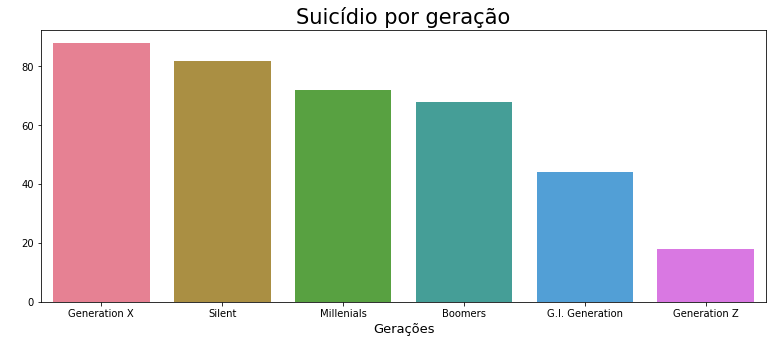

In [162]:
fig = plt.figure(figsize=(13,5))
sns.countplot('generation', order = df_suicidio_brasil['generation'].value_counts().index,palette="husl", data = df_suicidio_brasil)
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Suicídio por geração',fontsize=21);

**Renda per capita Brasil**

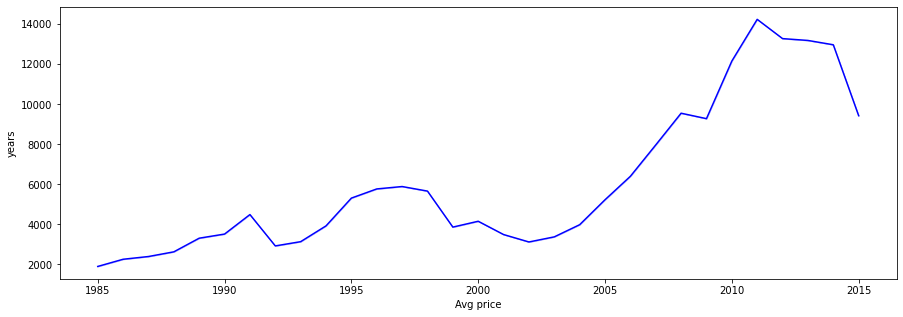

In [163]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_suicidio_brasil['year'],y=df_suicidio_brasil['gdp_per_capita ($)'], color="blue")
plt.xlabel('Avg price')
plt.ylabel('years')
plt.show()

**Gráfico por crescimento de suícidio por geração**

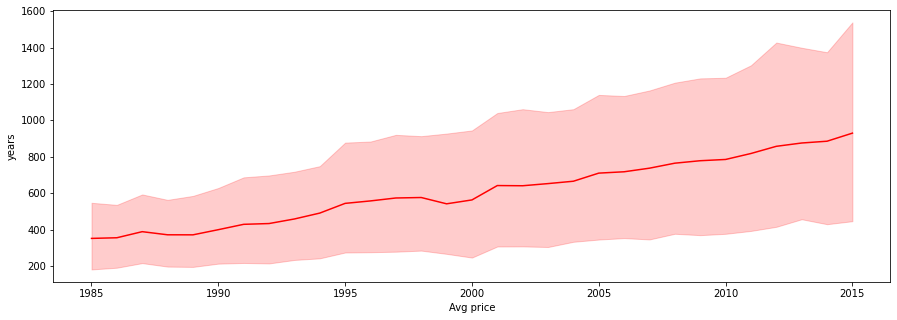

In [164]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_suicidio_brasil['year'],y=df_suicidio_brasil['suicides_no'], color="red")
plt.xlabel('Avg price')
plt.ylabel('years')
plt.show()

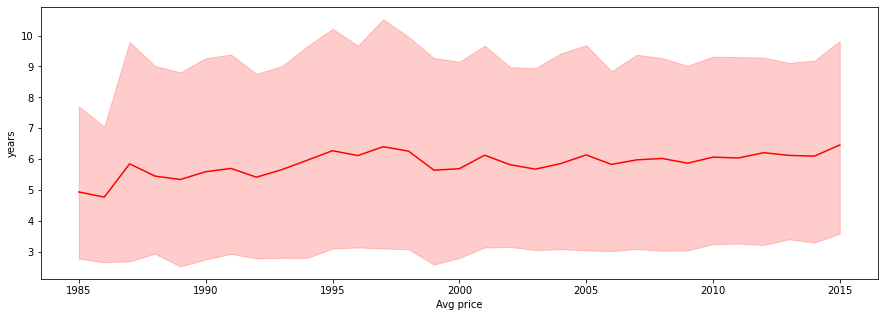

In [165]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_suicidio_brasil['year'],y=df_suicidio_brasil['suicides/100k pop'], color="red")
plt.xlabel('Avg price')
plt.ylabel('years')
plt.show()

Analisando o grafico da renda per capita do Brasil, nota-se que teve uma queda na renda no ano de 2015, o mesmo ano em que o Brasil teve um aumento na taxa de suicidios.   O que mostra que a renda de um pais e sa qualidade de vida pode infuência na taxa de suicidios. 

**Suicidio Brasil tabela por faixa etaria**

In [166]:
tabela = pd.pivot_table(df_suicidio_brasil, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '+75 years']
tabela = tabela.reindex(column_order, axis=1)
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,NaN
1986,31.0,508.0,505.5,651.0,372.0,NaN
1987,33.5,502.0,565.5,724.5,422.0,NaN
1988,30.0,472.0,557.5,724.0,356.0,NaN
1989,31.5,491.5,569.0,692.5,354.5,NaN


**Gráfico**

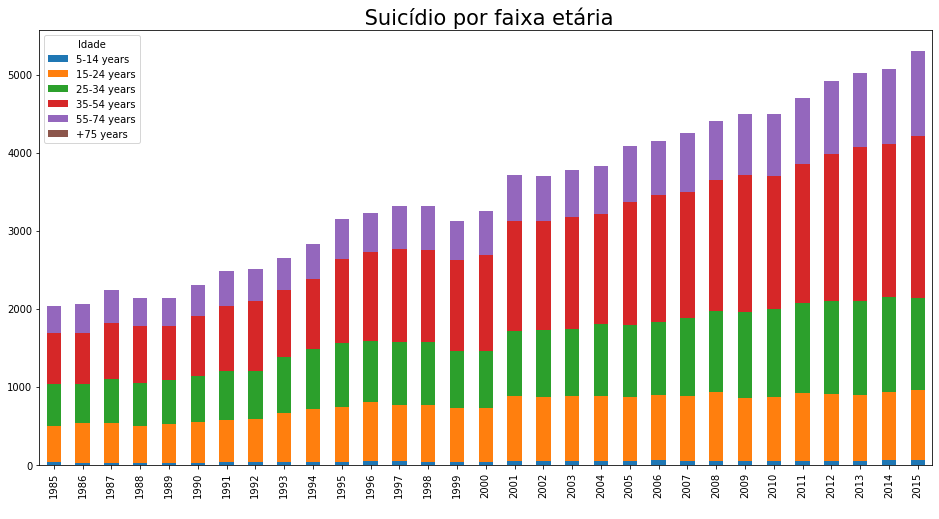

In [167]:
tabela.plot.bar(stacked=True,figsize=(16,8))
plt.legend(title='Idade')
plt.xlabel(' ')
plt.title(' Suicídio por faixa etária',fontsize=21);

In [168]:
cor=["#f781df","#8581f7"]

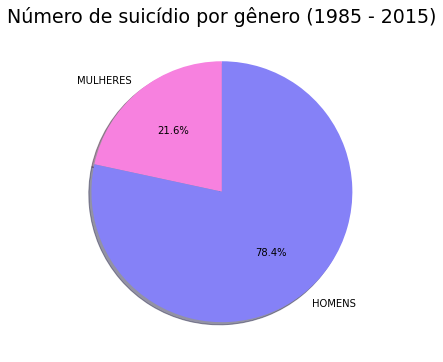

In [169]:
generos = df_suicidio_brasil.groupby('sex').suicides_no.sum() / df_suicidio_brasil.groupby('sex').suicides_no.sum().sum()
fig = plt.figure(figsize=(6,6))
plt.pie(generos, labels=['MULHERES', 'HOMENS'], colors=cor, autopct='%1.1f%%', shadow = True, startangle=90)
plt.title('Número de suicídio por gênero (1985 - 2015)', fontsize=19);

**Suicidio no Brasil X Mundo**

Text(0, 0.5, 'casos de suicidio a cada 100 mil pessoas')

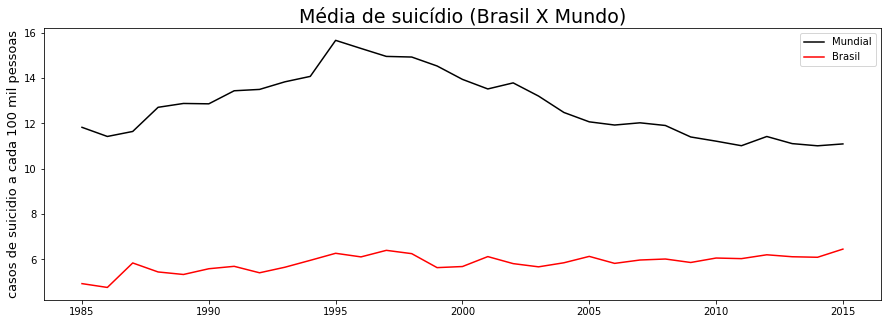

In [185]:
anos = df_suicidio_brasil.year.unique()
suicidio_brasil_media = df_suicidio_brasil.groupby('year')['suicides/100k pop'].mean()
suicidio_mundial_media = df_suicidio.groupby('year')['suicides/100k pop'].mean()
gdp_media_mundo = df_suicidio.groupby('year')['gdp_per_capita ($)'].mean()
gdp_media_brasil = df_suicidio_brasil.groupby('year')['gdp_per_capita ($)'].mean()

suicidio_mundial_media.drop(2016, inplace=True)

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=suicidio_mundial_media, label='Mundial', color='black')
ax = sns.lineplot(x=anos, y = suicidio_brasil_media, label='Brasil', color='red')
plt.title('Média de suicídio (Brasil X Mundo)', fontsize=19)
plt.ylabel('casos de suicidio a cada 100 mil pessoas',fontsize=13)